In [6]:
%pylab inline
import pandas as pd
import numpy as np
import xlrd
from pandas import Series, DataFrame
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as stm

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Cell 1 - 1 Mark

#Read in the data
df = pd.read_table('2017Health.txt',index_col='County')

#Change order of the columns
df = df[['Years of Potential Life Lost Rate','Teen Birth Rate','Violent Crime Rate','Percentage Smokers']]

#Print out the table
print(df)

            Years of Potential Life Lost Rate  Teen Birth Rate  \
County                                                           
Alachua                                  6633               19   
Baker                                    8270               58   
Bay                                      9168               50   
Bradford                                10346               61   
Brevard                                  7722               25   
...                                       ...              ...   
Taylor                                   7875               64   
Volusia                                  8295               32   
Wakulla                                  7548               31   
Walton                                   7962               45   
Washington                               8390               54   

            Violent Crime Rate  Percentage Smokers  
County                                              
Alachua                    579     

In [3]:
#Cell 2 - 5 Marks

#Write the specific data to its own dataframe
data = df['Percentage Smokers']

#Calculates the Standard Deviation
standard_deviation = data.std()

#Calculates the confidence interval
confidence_interval = (stats.bayes_mvs(data,0.95)[0][1])

#Prints all values rounded to 2 decimal places can be changed here
level_of_round = 4
print('Mean of percentage smokers: %s' %(round(data.mean(),level_of_round)))
print('Minimum of Percentage Smokers: %s' %data.min())
print('Maximum of Percentage Smokers: %s' %data.max())
print('Standard deviation of Percentage Smokers: %s' %(round(data.std(),level_of_round)))
print('95%s Confidence interval of Percentage Smokers \nis from %s to %s' %('%',round(confidence_interval[0],level_of_round),round(confidence_interval[1],level_of_round)))



Mean of percentage smokers: 16.9242
Minimum of Percentage Smokers: 11
Maximum of Percentage Smokers: 21
Standard deviation of Percentage Smokers: 2.3879
95% Confidence interval of Percentage Smokers 
is from 16.3372 to 17.5113


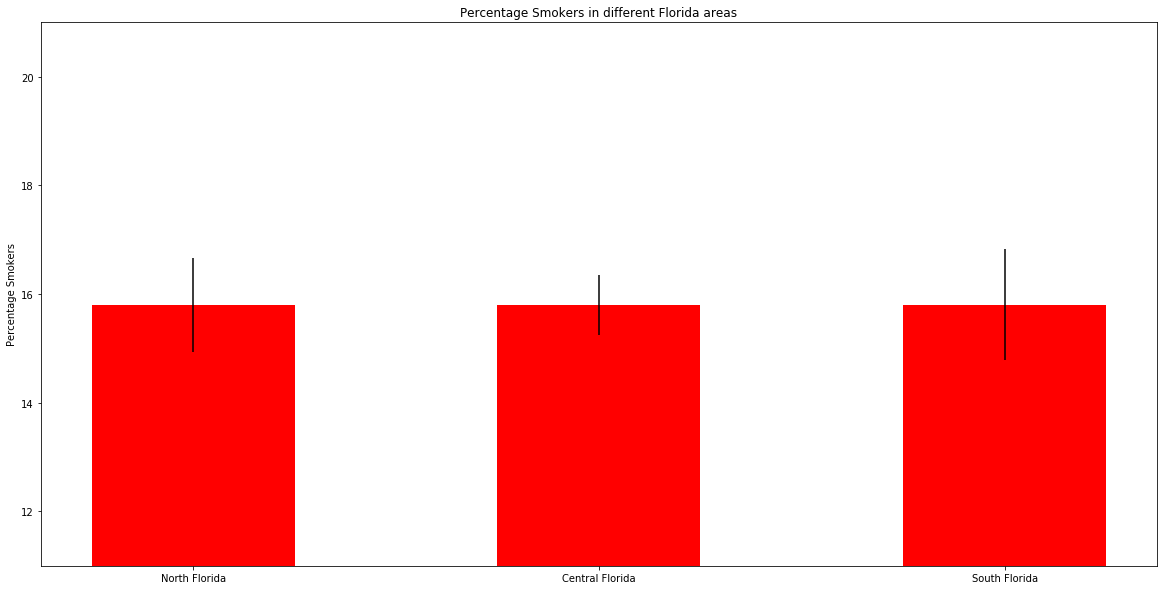

[17, 16, 16, 14, 16]


In [9]:
#Cell 3 - 6 Marks



PS_for_North   = [data['Duval'], data['Alachua'], data['Leon'], data['Flagler'], data['Marion']]
PS_for_Central = [data['Orange'], data['Polk'], data['Hillsborough'], data['Pinellas'], data['Brevard']]
PS_for_South   = [data['Miami-Dade'], data['Broward'], data['Lee'], data['Palm Beach'], data['Sarasota']]

North_mean    = round(mean(PS_for_North),2)
Central_mean  = round(mean(PS_for_North),2)
South_mean    = round(mean(PS_for_North),2)

North_error   = 1.96*std(PS_for_North)   / sqrt(len(PS_for_North))
Central_error = 1.96*std(PS_for_Central) / sqrt(len(PS_for_Central))
South_error   = 1.96*std(PS_for_South)   / sqrt(len(PS_for_South))

figure(figsize(20,10))
ind, width = [arange(3), 0.5]
bar(ind, [North_mean, Central_mean, South_mean], width, color='r', yerr =[North_error, Central_error, South_error])
ylabel('Percentage Smokers')

xtickloc   = ind
xticklabel = ['North Florida', 'Central Florida', 'South Florida']
xticks(xtickloc, xticklabel, rotation = 'horizontal')
title('Percentage Smokers in different Florida areas')
ylim(min(data),max(data))
show()




print(PS_for_North)


In [16]:
#Cell 4 - 2 Marks

years_lost = df["Years of Potential Life Lost Rate"]
years_lost_and_smoking = df[['Years of Potential Life Lost Rate', 'Percentage Smokers']]
years_lost_and_smoking = stm.add_constant(years_lost_and_smoking)
results = stm.OLS(years_lost, years_lost_and_smoking).fit()
print(results.summary())
c     = str(round(results.params[0],2))
TBR_m = str(round(results.params[1],2))
PS_m  = str(round(results.params[2],2))

print("Y = %s * TBR + %s * PS + %s" %(TBR_m,PS_m,c))


                                    OLS Regression Results                                   
Dep. Variable:     Years of Potential Life Lost Rate   R-squared:                       1.000
Model:                                           OLS   Adj. R-squared:                  1.000
Method:                                Least Squares   F-statistic:                 1.110e+30
Date:                               Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                                       15:06:18   Log-Likelihood:                 1593.3
No. Observations:                                 66   AIC:                            -3181.
Df Residuals:                                     63   BIC:                            -3174.
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                                        coef    std err     

In [ ]:
#Cell 5 - 6 Marks




